In [9]:
import pandas as pd

In [10]:
data=pd.read_csv('data.csv')
data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [11]:
data.drop_duplicates(inplace=True,subset=['name'])

In [12]:
name=data['name']

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [14]:
col_features = ['danceability', 'energy', 'valence', 'loudness']
X = MinMaxScaler().fit_transform(data[col_features])
kmeans = KMeans(init="k-means++",
                n_clusters=2,
                random_state=15).fit(X)
data['kmeans'] = kmeans.labels_

In [15]:
data['song_name']=name

In [16]:
data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,mode,name,popularity,release_date,speechiness,tempo,valence,year,kmeans,song_name
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,...,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,1,Singende Bataillone 1. Teil
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,...,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,0,"Fantasiestücke, Op. 111: Più tosto lento"
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,...,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,1,Chapter 1.18 - Zamek kaniowski
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,...,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,0,Bebamos Juntos - Instrumental (Remasterizado)
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,...,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,0,"Polonaise-Fantaisie in A-Flat Major, Op. 61"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169901,0.2640,"['Meek Mill', 'Roddy Ricch']",0.744,167845,0.7020,1,0j2CNrgtalXRGIvHMO2vzh,0.000000,7,0.1200,...,0,Letter To Nipsey (feat. Roddy Ricch),66,2020-01-27,0.2880,91.885,0.3380,2020,1,Letter To Nipsey (feat. Roddy Ricch)
169903,0.2100,"['LEGADO 7', 'Junior H']",0.795,218501,0.5850,0,52Cpyvd2dKb6XRn313nH87,0.000001,8,0.1120,...,1,Ojos De Maniaco,68,2020-02-28,0.0374,97.479,0.9340,2020,1,Ojos De Maniaco
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,...,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020,0,Skechers (feat. Tyga) - Remix
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,...,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020,0,Sweeter (feat. Terrace Martin)


In [17]:
cluster=data.groupby(by=data['kmeans'])

In [18]:
y=data.pop('kmeans')
x=data.drop(columns=['name','artists','id','release_date','song_name'])

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [20]:
!pip install lightgbm
from lightgbm import LGBMClassifier
model=LGBMClassifier().fit(x_train,y_train)

Matplotlib created a temporary cache directory at C:\Users\Acer\AppData\Local\Temp\matplotlib-bfg3c701 because the default path (C:\Users\Acer\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


Defaulting to user installation because normal site-packages is not writeable
[LightGBM] [Info] Number of positive: 58299, number of negative: 41406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002756 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2757
[LightGBM] [Info] Number of data points in the train set: 99705, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.584715 -> initscore=0.342159
[LightGBM] [Info] Start training from score 0.342159


In [21]:
model.score(x_train,y_train)

0.9992176921919663

In [22]:
model.score(x_test,y_test)

0.9950955318188657

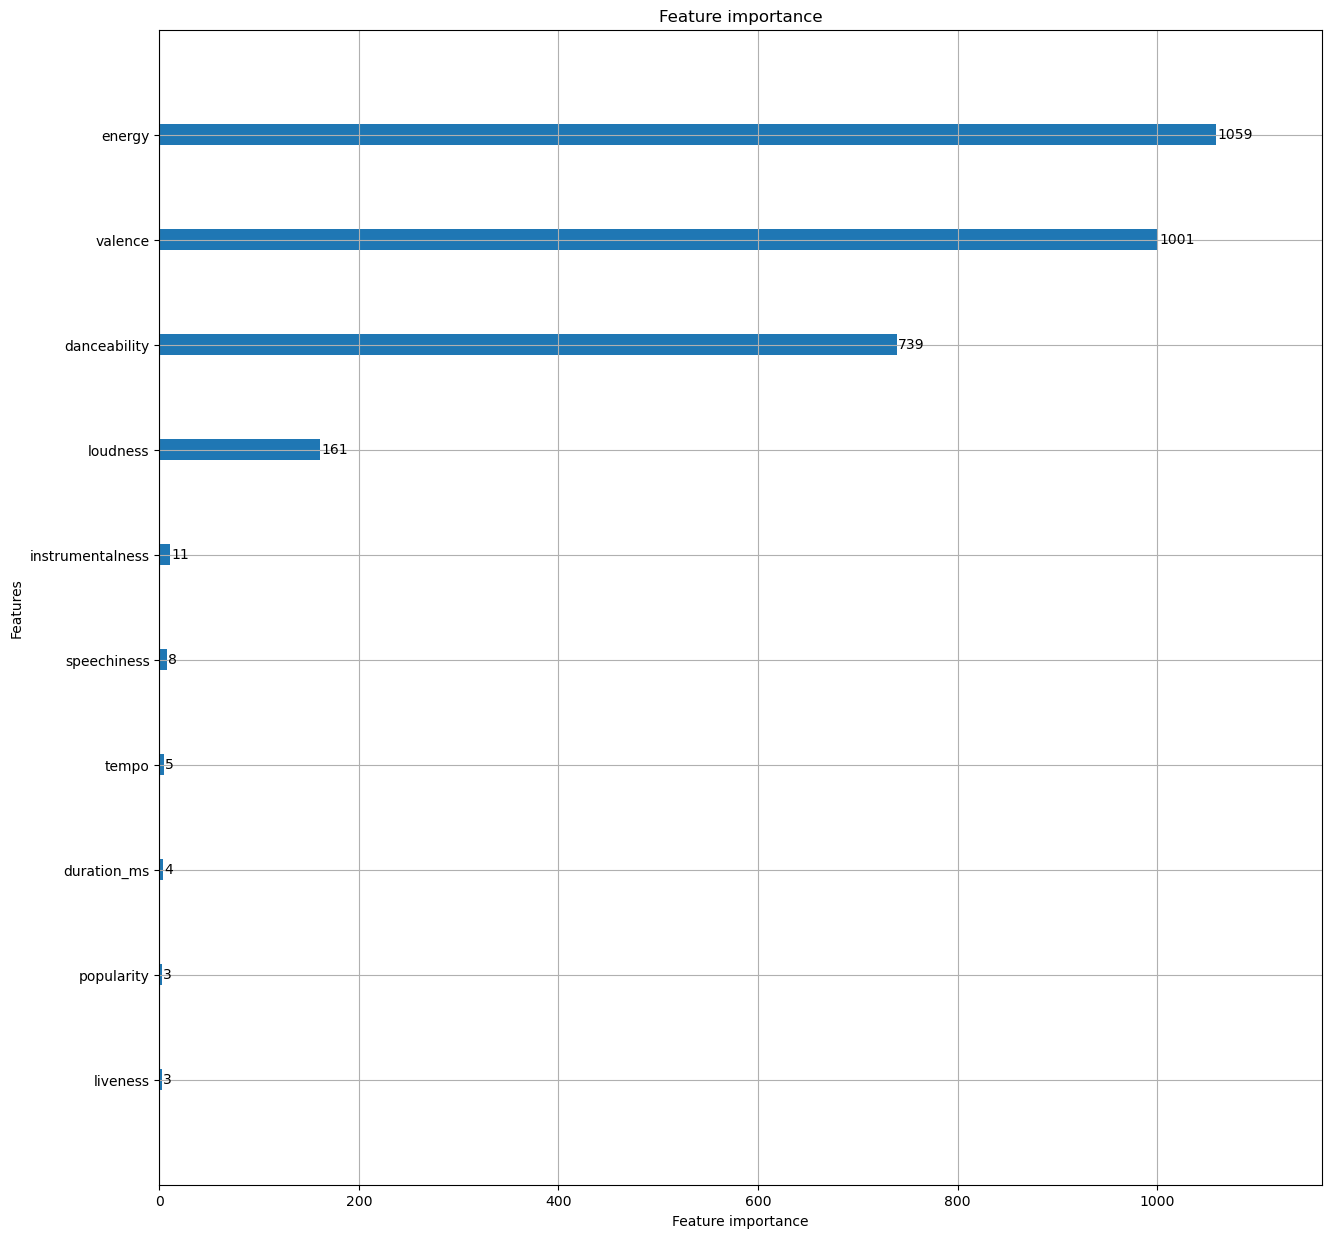

In [23]:
import lightgbm
import matplotlib.pyplot as plt
ax = lightgbm.plot_importance(model, max_num_features=10, figsize=(15,15))
plt.show()

In [24]:
df=cluster.apply(lambda x: x.sort_values(["popularity"],ascending=False))
df.reset_index(level=0, inplace=True)

In [25]:
!pip install imutils
from keras.preprocessing.image import img_to_array
import imutils
from keras.models import load_model
import numpy as np
import cv2

Defaulting to user installation because normal site-packages is not writeable


In [26]:
#detection_model_path = 'haarcascade_frontalface_default.xml'
#emotion_model_path = 'model.h5'
#face_detection = cv2.CascadeClassifier(detection_model_path)
#emotion_classifier = load_model(emotion_model_path, compile=False)
EMOTIONS = ["happy","sad"]
from tensorflow.keras.models import model_from_json
emotion_classifier = model_from_json(open("model.json", "r").read())
model.load_weights('model.h5')
import cv2
face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

AttributeError: 'LGBMClassifier' object has no attribute 'load_weights'

In [ ]:
from keras.preprocessing import image
def emotion_testing():
        cap=cv2.VideoCapture(0)
        while True:
            ret,test_img=cap.read()# captures frame and returns boolean value and captured image
            if not ret:
                continue
            gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

            faces_detected = face_detection.detectMultiScale(gray_img, 1.32, 5)


            for (x,y,w,h) in faces_detected:
                cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=7)
                roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
                roi_gray=cv2.resize(roi_gray,(48,48))
                img_pixels = image.img_to_array(roi_gray)
                img_pixels = np.expand_dims(img_pixels, axis = 0)
                img_pixels /= 255

                predictions = emotion_classifier.predict(img_pixels)

                #find max indexed array
                max_index = np.argmax(predictions[0])
                predicted_emotion = EMOTIONS[max_index]

                cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

            resized_img = cv2.resize(test_img, (1000, 700))
            cv2.imshow('Facial emotion analysis ',resized_img)



            if cv2.waitKey(0) & 0xFF == ord('q'):
                     break
        cap.release()
        cv2.destroyAllWindows
        return predicted_emotion

In [ ]:
emotion_word=emotion_testing()
if emotion_word=='sad':
    emotion_code=0
else:
    emotion_code=1